# Lab 6 Data Wrangling and Cleaning

Welcome to Lab 6! 

In general, here are some steps to carry out for data wrangling and cleaning as a rough guide. Make judgements based on your data and your data questions.

- cleaning:
    - drop duplicates and useless columns (please only drop if absolutely sure, you don't want to drop columns you may need later!)
    - rename columns if needed
    - handel missing values, whether drop missing values or conduct simple imputation to fill in missing values
        - for categorical variable, you can often create a new category called "missing" or "unknown" to represent missing values
        - it is ok to leave a small number of missing values in the data if you are not sure how to handle them, and you can decide what to do when modeling
- formatting:
    - if data types in columns are miscoded, convert them to the correct type. For example, datetime, numbers as strings, categorical variable coded as numbers etc. 
    - if certain categorical variables have too many categories, decide whether it makes sense to combine some small categories into one.
- merging:
    - merge multiple datasets if needed
    - investigate missing values after merge
- enriching:
    - split some columns if they contain more information, for example extract year, month, day and time
    - create new colunms from existing ones if needed
- sanity check of data:
    - check for duplicates records, missing values, data errors and outliers
    - document your steps and findings

Throughout the notebook, I will link some Python documentations of useful functions and methods for easy access. For example:
* [`df.isna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html), [`df.dropna`](https://www.google.com/search?q=df.dropna&rlz=1C5GCEM_enUS946US946&oq=df.dropna&aqs=chrome.0.69i59j0i512l9.2733j0j4&sourceid=chrome&ie=UTF-8), [`df.fillna`](https://www.google.com/search?q=df.fillna&rlz=1C5GCEM_enUS946US946&oq=df.fillna&aqs=chrome.0.69i59j0i512l9.1741j0j9&sourceid=chrome&ie=UTF-8)

Feel free to use any other functions, and add cells whenever you see fit. 

**Please make sure to**:

- Change, add, delete cells when necessary.
- Organize code in blocks:
    - start build multiple lines of code in one code cell to make your notebook more compact
    - use comment to debug each line when needed
    - add sufficient comments in your code for readability
    - write code into functions if you need to reuse code more than once
- Add cells for texts and document important steps along the way.   

In [6]:
### standard imports
import pandas as pd
import numpy as np

# you can set max number of rows and col to display on your screen
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

import matplotlib.pyplot as plt
# allow you to view the plots upon executing your code
%matplotlib inline
# set the plotting style, feel free to change!
plt.style.use('fivethirtyeight')
# prevent histogram bars to fuse together
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
# ignore warning message
warnings.filterwarnings('ignore')

## 1. Read in data

Our data in lab 6 is provided by the Austin Animal Center and updated on a weekly basis. It is seperated into 2 datasets:
- [Intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm): 
    - "Animal Center Intakes from Oct, 1st 2013 to present. Intakes represent the status of animals as they arrive at the Animal Center. All animals receive a unique Animal ID during intake."
- [Outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238): 
    - "Animal Center Outcomes from Oct, 1st 2013 to present. Outcomes represent the status of animals as they leave the Animal Center. All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners. The Outcomes data set reflects that Austin, TX. is the largest "No Kill" city in the country."
    
### key data question: how long are animals staying in the center? What proportion of animals stay in the center longer than a week, a month, a year? ###

- **Important:** pause here and discuss with your teammates, without looking at the data, what data do you need to anwser this question?

**Question 1.** Read in both data sets, and complete the following:
1. print out the number of rows and columns, column names and corresponding data type for each column. 
1. take a look at a few rows for both data sets. 
1. check for missing values in both data sets by printing out number of missing values for each column.

- Notice you can use [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) directly read csv files from website by copying the download link of that csv file, and put the link in a string as your csv file location. 
- That way, your data is living on the website, no need to download it, and it gets updated automatically (in this case on a weekly basis!)
- Downside is if the location of the file changes or your wifi connection does not work, you will get an error.

In [ ]:
### read in data
intake = pd.read_csv('https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD')
outcome = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [ ]:
### your code here
# print shape 
print('Intake shape:', ...)
print('Outcome shape:', ...)
# print column names and data type
...

## 2. Cleaning

It looks like the missing values are not a big concern in this case: most variables contain no or very small number of missing values, a couple of variables with lots of missing are not really of interest. For now, we are going to leave the missing values as they are.

**Question 2.** Next, let's check if there are any duplicate records. It is time to practice your ability of reading Python documentation: check out [`df.duplicated`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) and [`df.drop_duplicates`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).
1. How to find if `intake` contains duplicated rows? This is defined by two rows having identical values for all columns.
1. How to identify some rows in `intake` that have duplicated animal ID? Find such rows and take a look! Does that help you understand what these duplicate animal ID indicate?
1. After these investigation, decide what to do with the duplicated rows (identical values for all columns) and duplicated Animal IDs. 
1. Repeat the same for `outcome`.

In [ ]:
### your code here

## 3. Formatting

Now that you have some basic understanding of the data, remind your self the **key data questions**, and discuss with your teammates, what key columns/variables in the data do you need to anwser this question?

**Question 3.**
1. Change the `DateTime` columns to correct datetime data type use [`pd.to_datetime`](https://www.google.com/search?q=pd.to_datetime&rlz=1C5GCEM_enUS946US946&oq=pd.t&aqs=chrome.1.69i57j69i59i433i512j69i59j0i512l7.2963j0j4&sourceid=chrome&ie=UTF-8), name the columns as `IntakeDateTime` and `OutcomeDateTime` in the corresponding df.
2. Drop columns contain redundant information or not relevant to our analysis: [`df.drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
    - `intake`: drop `DateTime`, `MonthYear`, `Found Location`
    - `outcome`: drop `DateTime`, `MonthYear`, `Outcome Subtype`

In [ ]:
### your code here

## 4. Merging data

**Question 4.** Let's merge the `intake` and `outcome` using [`df.merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). Before writing the code, discuss with your teammates:
- why do we want to merge the two data?
- what are the common columns that allow us to merge?
- which type of merge should we use: outer, inner, left or right?
- do you foresee any issue after the merge? 


1. Choose the approperiate type of merge, and name your merged df `austin_animal`.
1. Investigate missing values due to non-match records, decide what to do with them.
1. Clean up merged data by renaming and dropping columns if needed.

In [ ]:
### your code here

## 5. Enriching data

**Question 5.** Now we are finally ready to calculate the time in center for each animal. The good thing is, since we correctly converted intake and outcome date/time to datetime type, you can directly calculate the difference between two datetimes by datetime1 - datetime2. To get the number of days, you can use [`datetime.dt.days`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.days.html).

1. Creat a new column in `austin_animal` called `DayInCenter` as the number of days stay in the center.
1. Do a couple of spot check to make sure the calculation is correct.
1. Then create the following for `DayInCenter`, our key variable of interest (what variable type is this?):
    - some summary statistics by [`df.describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
    - a visualization of the distribution by [`df.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

In [ ]:
### your code here

## 6. What??? 

**Question 6 (bonus question for 10 points).** Figure out what went wrong and how to fix the issue and get the correct `DayInCenter`. 
1. Notice it is NOT as simple as filter out all the negative days!
    - of course there should be no negative days at all
    - but some of the super long days are also suspicious
    
Let's Discuss with your team again! As a hint, let me tell you a story about this cute cat named Little Girl, and you can look up her records using **animal ID A819006**.

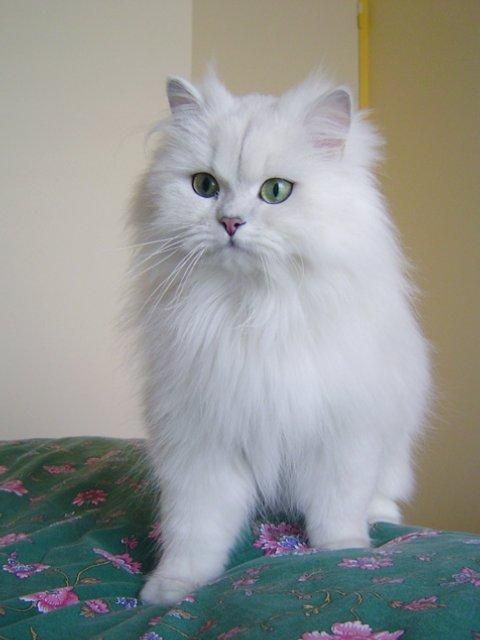

Little Girl lives in Austin with her happy family. On 6/19/2020 she was sent to Austin Animal Center but was adopted on 6/25/2020. Unfortunately, Little Girl was sent to the center again on 7/24/2020 again, then was adopted on 8/11/2020. 

Look up the records of Little Girl in `intake`, `outcome` and in your merged dataframe. What did you discover? How should you correctly calculate the two times Little Girl stayed in the center?

In [ ]:
### your code here

In [ ]:
### anwser the data question!!!
print('Percentage of animals stay in Austin Animal Center')
print('longer than a week: ', '%1.2f%%'%  ...)
print('longer than a month: ', '%1.2f%%'% ...)
print('longer than a year: ', '%1.2f%%'% ...)

You're finished with lab 6! Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file** to be lab06_yourname,
* **Get your file ready** for grading during next lab session. 